## Homework 10

In this homework, you are going to use the code from ```TrafficSignsClassification``` notebook and create your own traffic sign classifier.

### Step 1
Use the data from ```data/subset_homework``` folder and visualize some examples. How many images are there for each class?

class_0 - 2220
class_1 - 2250

### Step 2
Run the training with one single neuron (as we did in the lecture). What accuracy can you achieve?

Accuracy 0.9102908277404922

### Step 3
Make further modifications to improve the accuracy (e.g. add more neurons, more layers, etc.). What is the maximum accuracy you can achieve?

я сначала доабвил слой с tanh и получил точность 0.9393736017897092, потом заменил на relu и получил 0.963758389261745. 

решил их использовать двоих relu 100 нейронов + tanh 50 и получилось хуже чем просто relu 100 - 0.9467561521252796. 

поменял их местами и получил результат - 0.9765100671140939. 

увеличил количество нейронов до 1000 и 500 соотвественно и получил результат 0.9693512304250559, что не лучшу чем когда было в меньше нейронов. 

повторил обучение и уже результат получил 0.9715883668903803. 

Вернулся к 100 и 50 нейронам так как он оптимальный и увеличил количесвто эпох до 20, результат - 0.9657718120805369. явного улучшения не дало. 

добавил еще один слой leaky_relu на 20 нейронов и получил результат 0.9731543624161074. 

сделал всем слоям по 100 нейронов и получил результат - 0.9742729306487695.

решил вернуться к двум слоям tanh 100 relu 50, но пройти 100 эпох, и уже на 50 итерации вижу что уже loss 0.005, дождался выполнения и результат - 0.9995525727069351. 

Посмотрев на график тренировки вижу что скорее всего оптимально будет 60 эпох. 

запускаем на 60 :) результат - 0.9991051454138703. 

исходя из экспериментов вижу что количесвто слоев и нейронов влияет на резултат, но так дже очень сильно влияет количество итераций обучения. 


In [1]:
import os
import cv2
from time import time
import numpy as np
from sklearn.utils import shuffle

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 6]

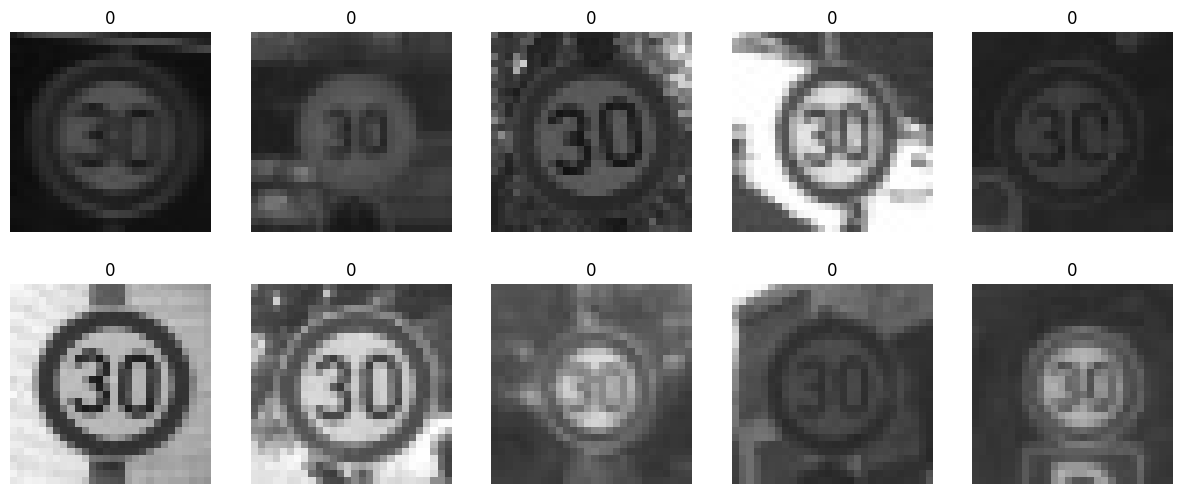

In [2]:
folder = '../data/subset_homework'

fnames_0 = os.listdir(os.path.join(folder, 'class_id_0'))
images_0 = [cv2.imread(os.path.join(folder, 'class_id_0', f), cv2.IMREAD_UNCHANGED) for f in fnames_0]
labels_0 = [0] * len(images_0)

for cnt, idx in enumerate(np.random.randint(0, len(images_0), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images_0[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_0[idx]), plt.axis(False)

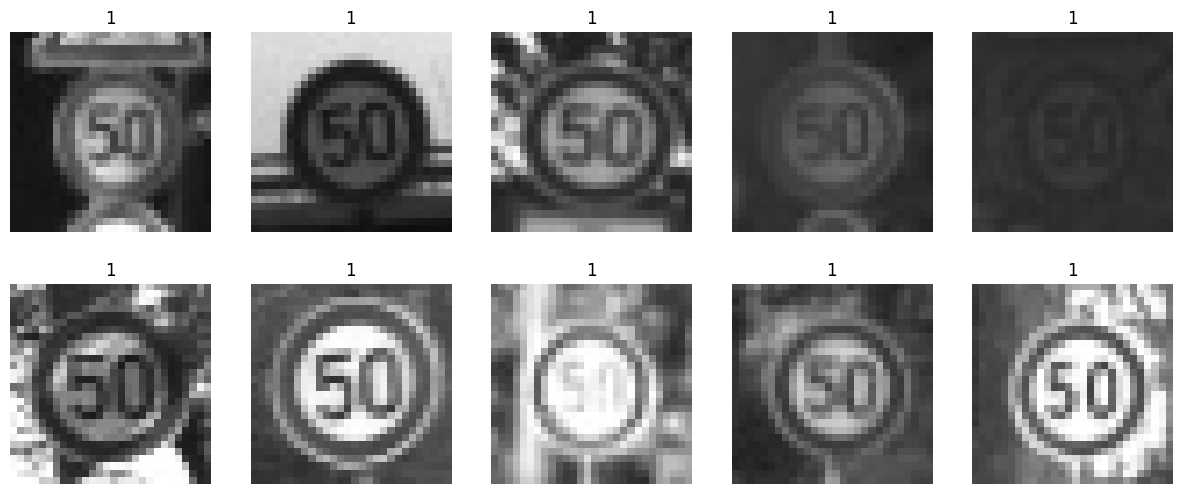

In [3]:
fnames_1 = os.listdir(os.path.join(folder, 'class_id_1'))
images_1 = [cv2.imread(os.path.join(folder, 'class_id_1', f), cv2.IMREAD_UNCHANGED) for f in fnames_1]
labels_1 = [1] * len(images_1)

for cnt, idx in enumerate(np.random.randint(0, len(images_1), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images_1[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_1[idx]), plt.axis(False)

In [4]:
print('Num samples class_0', len(images_0))
print('Num samples class_1', len(images_1))

Num samples class_0 2220
Num samples class_1 2250


In [5]:
images = images_0 + images_1
labels = labels_0 + labels_1
images, labels = shuffle(images, labels)

images = np.array(images)
labels = np.array(labels)

print('Images', images.shape)
print('Labels', labels.shape)

Images (4470, 28, 28)
Labels (4470,)


In [6]:
start = time()
pixels = np.array([image.flatten() for image in images])/255
stop = time()

print('Shape', pixels.shape)
print('Elapsed time', stop - start)

Shape (4470, 784)
Elapsed time 0.025494098663330078


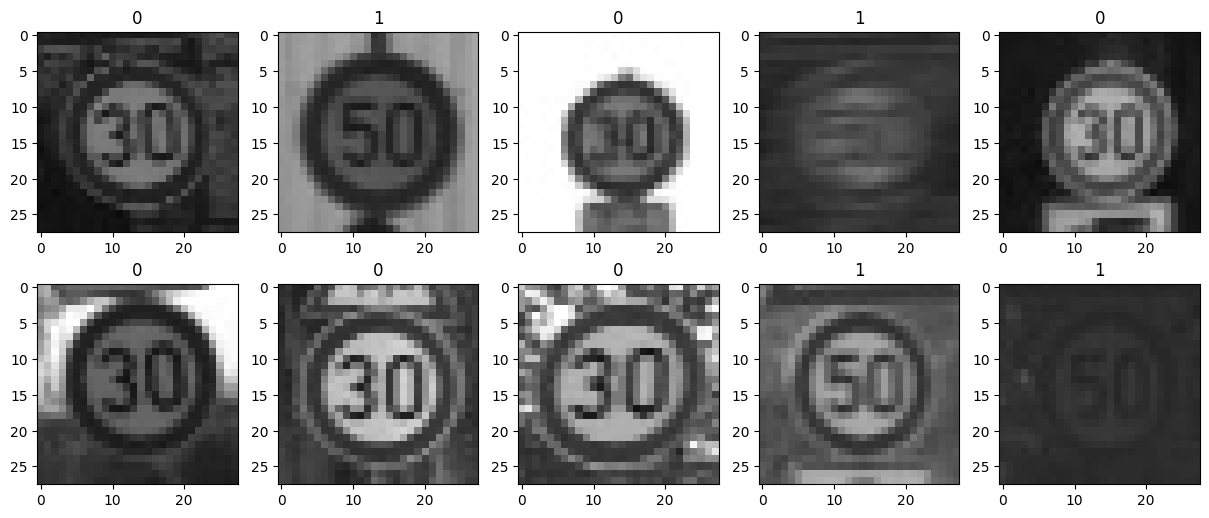

In [7]:
for cnt, idx in enumerate(np.random.randint(0, len(images), 10)):    
    plt.subplot(2,5,cnt+1)
    plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels[idx])

In [49]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input

In [50]:
pixels.shape

(4470, 784)

In [155]:
inputs = Input(shape=(pixels.shape[1],))
outputs = Dense(100, activation="tanh")(inputs)
outputs = Dense(50, activation="relu")(outputs)
outputs = Dense(1, activation="linear")(outputs)
model = Model(inputs, outputs)

model.summary()

Model: "functional_43"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_21 (InputLayer)     │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 83,601 (326.57 KB)

 Trainable params: 83,601 (326.57 KB)

 Non-trainable params: 0 (0.00 B)

In [156]:
model.compile(optimizer ='adam', loss = 'mean_squared_error')

In [157]:
history = model.fit(pixels, labels, epochs=60, batch_size=32)

Epoch 1/60
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.3087
Epoch 2/60
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.1749
Epoch 3/60
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.1135
Epoch 4/60
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0849
Epoch 5/60
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0689
Epoch 6/60
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0799
Epoch 7/60
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0611
Epoch 8/60
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0623
Epoch 9/60
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0504
Epoch 10/60
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0543
Epoch 11/60
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0470
Epoch 12/60
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0492
Epoch 13/60
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0454
Epoch 14/60
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0457
Epoch 15/60
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 1

(Text(0.5, 0, 'epoch'), Text(0, 0.5, 'loss'))

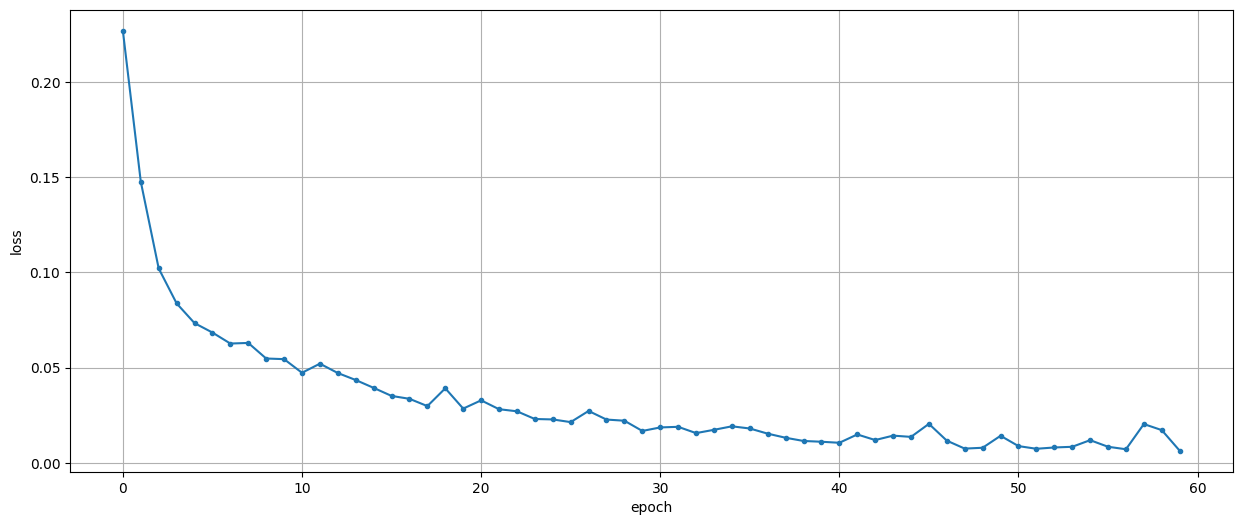

In [158]:
# Plot training history
h = history.history
epochs = range(len(h['loss']))
plt.plot(epochs, h['loss'], '.-'), plt.grid(True)
plt.xlabel('epoch'), plt.ylabel('loss')

In [159]:
predictions = model.predict(pixels).squeeze()
predictions = predictions > 0.5

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [160]:
correct = 0
for prediction, label in zip(predictions, labels):
    if prediction == label:
        correct = correct + 1

print('Accuracy', correct/len(labels))

Accuracy 0.9991051454138703


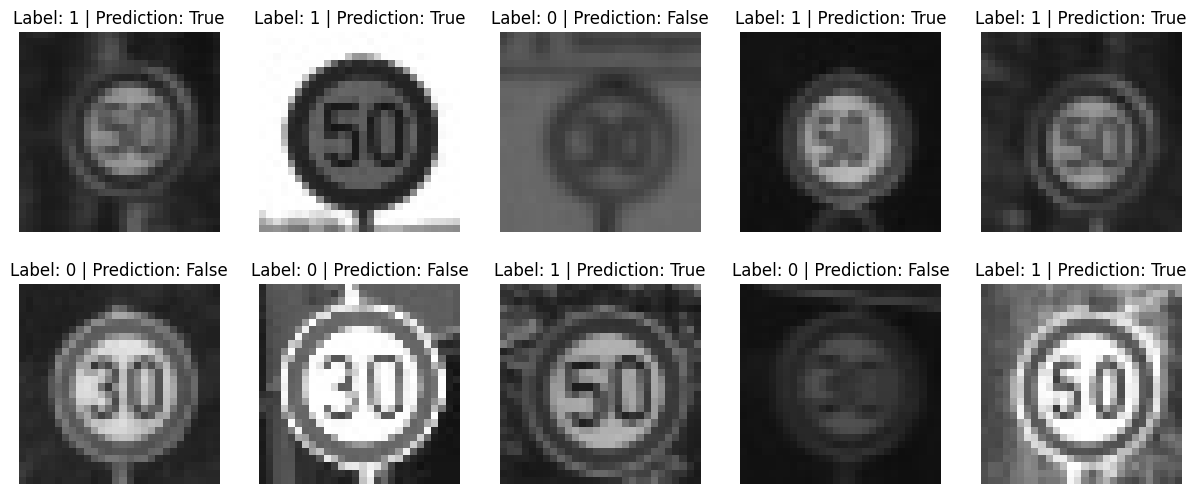

In [82]:
for cnt, idx in enumerate(np.random.randint(0, len(images), 10)): 
    plt.subplot(2,5,cnt+1), plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
    plt.title('Label: ' + str(labels[idx]) + ' | Prediction: ' + str(predictions[idx]))
    plt.axis(False)